In [1]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector 
from qiskit.quantum_info import Statevector

from math import sqrt, pi

# Simulador
sim = Aer.get_backend('aer_simulator')

1. Compuertas de Pauli

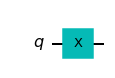

In [2]:
# Realizamos la compuerta X sobre el qubit 0
qc = QuantumCircuit(1)
qc.x(0)
qc.draw("mpl")

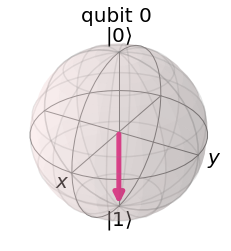

In [3]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [4]:
# Ejecutemos el codigo en esta celda para ver el widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

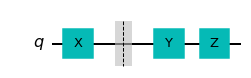

In [5]:
# Aplicamos la compuerta Y sobre el qubit 0
qc.y(0)
# Aplicamos la compuerta Z sobre el qubit 0
qc.z(0) 
qc.draw("mpl")

Ejercicios
1. Verificar que $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$ y $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)$ son autoestados de la compuerta $X$

In [6]:
# Creamos el circuito con el qubit 0
qc_p = QuantumCircuit(1)
#Inicializamos el estado del circuito en |0>
state_p = Statevector.from_int(0, 2**1)
# Aplicamos la compuerta H qubit que esta inicialmente en |0>, para que quede en el 
# estado |+>
qc_p.h(0)
qc_p.x(0)

# Evolucionamos el estado a traves del circuito cuantico
state_p = state_p.evolve(qc_p)

# Dibujamos usando latex
state_p.draw('latex')

# RESULTADO: Podemos ver que la salida del vector de estado |+>, luego de pasar por la 
# compuerta X es el mismo estado |+>. El autovalor de la compuerta X sobre el estado |+>
# es 1

<IPython.core.display.Latex object>

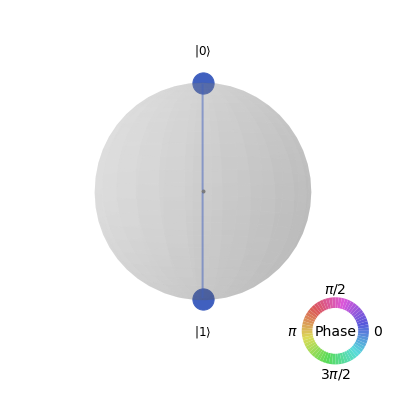

In [7]:
# Graficamos sobre la q-sphere
# Como vemos, tenemos dos vectores: uno en |0> y otro en |1>. El ancho de la mancha borrosa
# es la misma para los dos pq tienen la misma amplitud de probabilidad. El azul indica que
# no hay fase relativa entre los dos estados base |0> y |1>
state_p.draw("qsphere")

In [8]:
# Creamos el circuito con el qubit 0
qc_m = QuantumCircuit(1)
#Inicializamos el estado del circuito en |1>
state_m = Statevector.from_int(1, 2**1)
# Aplicamos la compuerta H qubit que esta inicialmente en |1>, para que quede en el 
# estado |->
qc_m.h(0)
qc_m.x(0)

# Evolucionamos el estado a traves del circuito cuantico
state_m = state_m.evolve(qc_m)

# Dibujamos usando latex
state_m.draw('latex')

# RESULTADO: Podemos ver que la salida del vector de estado |->, luego de pasar por la 
# compuerta X es el -estado |->, pero como es una fase global, no importa ésta. 
# El autovalor de la compuerta X sobre el estado |-> es -1

<IPython.core.display.Latex object>

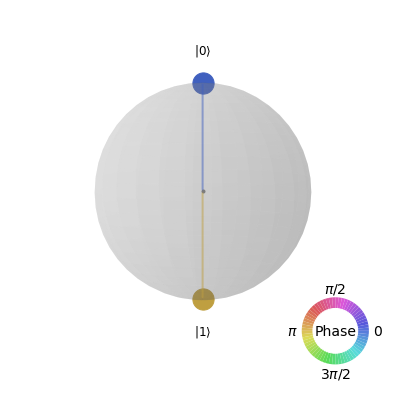

In [9]:
# Graficamos sobre la q-sphere
# Como vemos, tenemos dos vectores: uno en |0> y otro en |1>. El ancho de la mancha borrosa
# es la misma para los dos pq tienen la misma amplitud de probabilidad. Los dos colores
# diferentes indican que hay fase relativa entre los dos estados base |0> y |1>

state_m.draw("qsphere")

Solucion de forma realista con medidas sobre el qubit

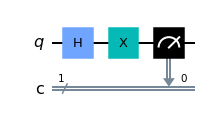

In [10]:
# Creamos los estados |+> y |-> (autoestados de X) y verificar que son autoestados de x

# Creamos el circuito cuantico con 1 qubit (el qubit 0)
circ = QuantumCircuit(1,1)  
# Definimos los initial_state como |+> initial_state1
# Si queremos que el estado inicial del qubit sea |1>, desmarcamos la
#circ.x(0) 
circ.h(0)
# Aplicamos la inicializacion del qubit 0 
circ.x(0)
circ.measure(0,0)
# Observemos el circuito
circ.draw("mpl") 

{'1': 471, '0': 529}


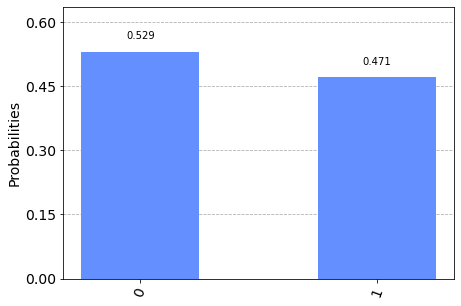

In [11]:
# Usamos un simulador de un computador cuantico
backend = Aer.get_backend("qasm_simulator")

# Ejecutamos el circuito (sobre cual circuito, cual backend y cuantas veces)
job = execute(circ, backend, shots=1000)

# MOstramos los resultados de la ejecucion
results = job.result()

# Cuentas de cuantas veces colapsa en cada uno de los estados base
counts = results.get_counts()
print(counts)
plot_histogram(counts)

2. Encuentrar los autoestados de la compuerta $Y$ y sus coordenadas en la esfera de Bloch

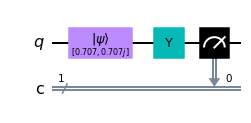

In [12]:
# Creamos el circuito cuantico con el qubit 0 
qc = QuantumCircuit(1,1)
# Definimos el estado inicial (matricialmente) (|0> + i |1>)/sqrt(2) 
initial_state = [1/sqrt(2),1j/sqrt(2)]  
# Inicializamos el qubit 0
qc.initialize(initial_state, 0) 
# Aplicamos la compuerta Y sobre el qubit 0
qc.y(0)
# Realizamos la medida del estado
qc.measure(0,0)
# Observemos el circuito
qc.draw("mpl")  

{'0': 510, '1': 490}


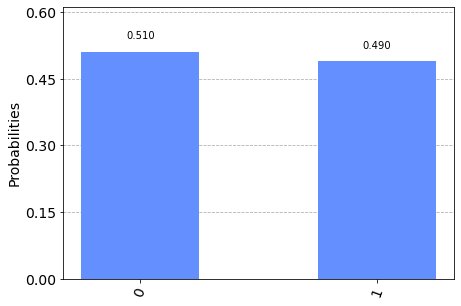

In [13]:
# Usamos un simulador de un computador cuantico
backend = Aer.get_backend("qasm_simulator")

# Ejecutamos el circuito (sobre cual circuito, cual backend y cuantas veces)
job = execute(qc, backend, shots=1000)

# MOstramos los resultados de la ejecucion
results = job.result()

# Cuentas de cuantas veces colapsa en cada uno de los estados base
counts = results.get_counts()
print(counts)
plot_histogram(counts)

In [14]:
# Creamos el circuito con el qubit 0
qc_r = QuantumCircuit(1)
#Inicializamos el estado del circuito en |r>
state_r = Statevector.from_label("r")
# Aplicamos la compuerta H qubit que esta inicialmente en |r>, para que quede en el 
# estado |->
#qc_r.y(0)

# Evolucionamos el estado a traves del circuito cuantico
#state_m = state_m.evolve(qc_m)

# Dibujamos usando latex
state_m.draw('latex')

# RESULTADO: Podemos ver que la salida del vector de estado |->, luego de pasar por la 
# compuerta X es el -estado |->, pero como es una fase global, no importa ésta. 
# El autovalor de la compuerta X sobre el estado |-> es -1

<IPython.core.display.Latex object>

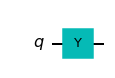

In [15]:
# Creamos el circuito con el qubit 0
qc_r = QuantumCircuit(1)
#Inicializamos el estado del circuito en |1>
state_r = Statevector.from_label("r")
# Aplicamos la compuerta Y sobre el qubit 0
qc_r.y(0)
# Evolucionamos el estado a traves del circuito cuantico
state_r = state_r.evolve(qc_r)
# Dibujamos usando latex
state_r.draw('latex')
qc_r.draw("mpl")

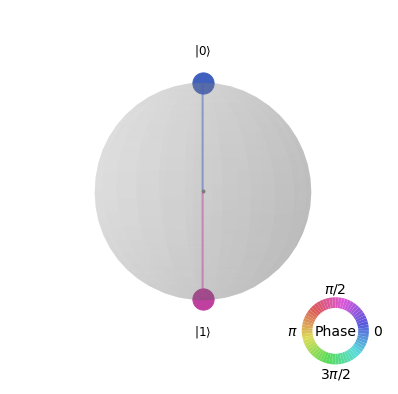

In [16]:
# Graficamos sobre la q-sphere
# Como vemos, tenemos dos vectores: uno en |0> y otro en |1>. El ancho de la mancha borrosa
# es la misma para los dos pq tienen la misma amplitud de probabilidad. El azul indica que
# no hay fase relativa entre los dos estados base |0> y |1>
state_r.draw("qsphere")

In [35]:
# Creamos el circuito con el qubit 0
qc_l = QuantumCircuit(1)
#Inicializamos el estado del circuito en |1>

# Aplicamos la compuerta H qubit que esta inicialmente en |1>, para que quede en el 
# estado |->
qc_l.h(0)
qc_m.x(0)

# Evolucionamos el estado a traves del circuito cuantico
state_m = state_m.evolve(qc_m)

# Dibujamos usando latex
state_m.draw('latex')

# RESULTADO: Podemos ver que la salida del vector de estado |->, luego de pasar por la 
# compuerta X es el -estado |->, pero como es una fase global, no importa ésta. 
# El autovalor de la compuerta X sobre el estado |-> es -1

<IPython.core.display.Latex object>

In [42]:
# Definimos el estado |q_0>
initial_state = [1/sqrt(2), 1j/sqrt(2)]  
# Redefinimos el circuito cuantico
qc = QuantumCircuit(1) 
# Inicializamos el qubit 0 en el estado inicial "initial_state"
qc.initialize(initial_state, 0) 
qc.y(0)
# Almacenamos el vector de estado
qc.save_statevector() 
qobj = assemble(qc)
# Ejecutamos el circuito cuantico
state = sim.run(qobj).result().get_statevector() 
# Imprimimos el resultado 
print(state)  
state.draw('latex')

Statevector([0.70710678-0.j        , 0.        +0.70710678j],
            dims=(2,))


<IPython.core.display.Latex object>

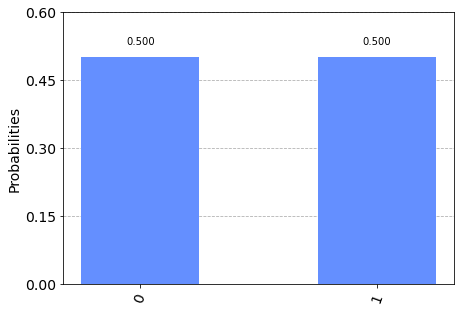

In [39]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

Compuerta Hadamard

In [40]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

Mostrar que la aplicacion de las compuertas $HZH$ es equivalente a la accion de la  compuerta $X$

In [51]:
# Definimos el estado inicial |q_0> = |0>
initial_state = [1, 0]  
# Redefinimos el circuito cuantico
qc = QuantumCircuit(1) 
# Inicializamos el qubit 0 en el estado inicial "initial_state"
qc.initialize(initial_state, 0) 
qc.h(0)
qc.z(0)
qc.h(0)
# Almacenamos el vector de estado
qc.save_statevector() 
qobj = assemble(qc)
# Ejecutamos el circuito cuantico
state = sim.run(qobj).result().get_statevector()   

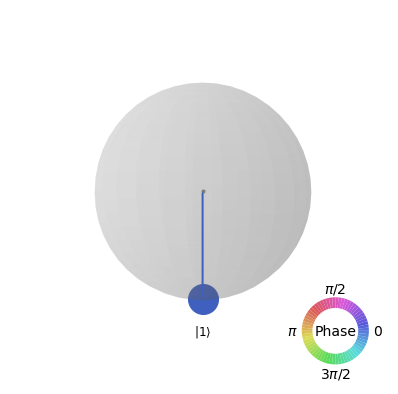

In [52]:
# Luego, vemos que la accion es la misma que la de la compuerta X, ya que invierte el 
# estado del qubit de 0 a 1
state.draw("qsphere")

3. Encuentrar una combinación de puertas $X$, $Z$ y $H$ que sea equivalente a una puerta $Y$ (ignorando la fase global).\\

Respuesta: ignorando la fase global, la compuerta $Y$ es:
\begin{matrix}
0 & -1 \\
1 & 0
\end{matrix}
Basta con multiplicar las compuertas $X$ y $Z$

Dado que Qiskit solo permite medir en base de $\hat{z}$, debemos crear el nuestro usando puertas de Hadamard:

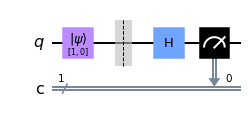

In [135]:
# Creamos una funcion que mida en la base de X para poder hacer medidas proyectando sobre 
# estos autoestados (|+>, |->)
def x_measurement(qc, qubit, cbit):
    """
    Mide 'qubit' en la base de X, y almacena el resultado en 'cbit'
    
    qc: circuito cuantico sobre el cual queremos proyectar con |+> y |->
    qubit: qubit cuantico que sera medido
    cbit: bit clasico donde sera codificada la medida
    """
    # Aplicamos Hadamard al qubit para ponerlo en superposicion
    qc.h(qubit)
    # Grabamos el vector de estado del sistema
    #qc.save_statevector()  
    # Realizamos el proceso de medida del qubit y almacenamos el resultado en el bit clasico
    qc.measure(qubit, cbit)
    return qc

# Creamos el circuito cuantico con un qubit y un bit de lectura
qc = QuantumCircuit(1, 1)
# Configuramos el estado inicial del qubit
initial_state = [1,0] # (|0>) [1/sqrt(3), sqrt(2)/sqrt(3)]
# Inicializamos el estado del qubit
qc.initialize(initial_state, 0)
# Grabamos el vector de estado del sistema
qc.save_statevector()  
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
#qc.save_statevector()
qc.draw("mpl")

In [136]:
qobj = assemble(qc)
# Ejecutamos el circuito cuantico
state = sim.run(qobj).result().get_statevector() 

{'1': 495, '0': 505}


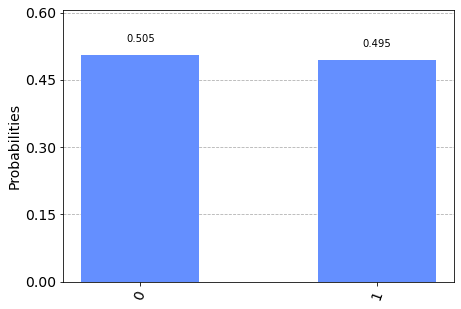

In [137]:
# Usamos un simulador de un computador cuantico
backend = Aer.get_backend("qasm_simulator")

# Ejecutamos el circuito (sobre cual circuito, cual backend y cuantas veces)
job = execute(qc, backend, shots=1000)

# MOstramos los resultados de la ejecucion
results = job.result()

# Cuentas de cuantas veces colapsa en cada uno de los estados base
counts = results.get_counts()
print(counts)
plot_histogram(counts)

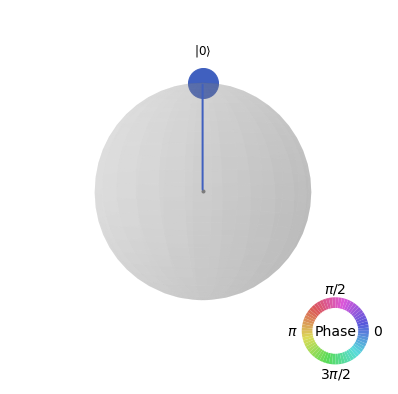

In [138]:
state.draw("qsphere")

3. Tratar de hacer una funcion que mida en la base $Y$.

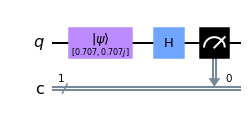

In [154]:
# Creamos una funcion que mida en la base de Y para poder hacer medidas proyectando sobre 
# estos autoestados (|+,y>, |-,y>)
def y_measurement(qc, qubit, cbit):
    """
    Measure 'qubit' in the Y-basis, and store the result in 'cbit'
    
    qc: circuito cuantico sobre el cual queremos proyectar con |+,y> y |-,y>
    qubit: qubit cuantico que sera medido
    cbit: bit clasico donde sera codificada la medida
    """
    # Aplicamos Hadamard al qubit para ponerlo en superposicion
    qc.x(qubit)
    qc.z(qubit)
    # Grabamos el vector de estado del sistema
    qc.save_statevector()  
    # Realizamos el proceso de medida del qubit y almacenamos el resultado en el bit clasico
    qc.measure(qubit, cbit)
    return qc

# Creamos el circuito cuantico con un qubit y un bit de lectura
qc = QuantumCircuit(1, 1)
# Configuramos el estado inicial del qubit
initial_state = np.array([-1j/sqrt(2),1/sqrt(2)]) # (|+,y>) [1/sqrt(3), sqrt(2)/sqrt(3)]
# Inicializamos el estado del qubit
qc.initialize(1j*initial_state, 0)
# Grabamos el vector de estado del sistema
#qc.save_statevector()  
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
#qc.save_statevector()
qc.draw("mpl")

{'1': 502, '0': 498}


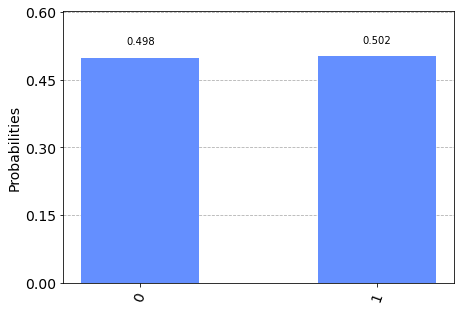

In [155]:
# Usamos un simulador de un computador cuantico
backend = Aer.get_backend("qasm_simulator")

# Ejecutamos el circuito (sobre cual circuito, cual backend y cuantas veces)
job = execute(qc, backend, shots=1000)

# MOstramos los resultados de la ejecucion
results = job.result()

# Cuentas de cuantas veces colapsa en cada uno de los estados base
counts = results.get_counts()
print(counts)
plot_histogram(counts)

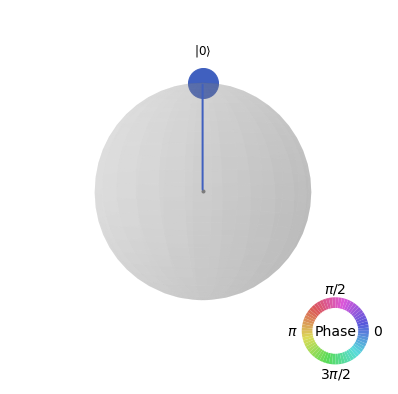

In [156]:
state.draw("qsphere")

Compuerta P (compuerta de fase)

In [157]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

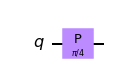

In [159]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw("mpl")

Compuerta $\sqrt{Z} = P(\phi = \pi/2)$ 

In [ ]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw()

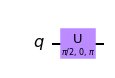

In [162]:
# Let's have U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)
qc.draw("mpl")

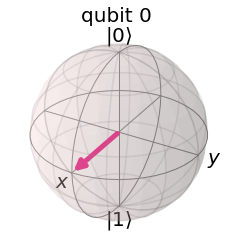

In [163]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)